In [4]:
import pandas as pd
import warnings
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import scipy.stats
from scipy.stats import norm
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.svm import SVC


warnings.filterwarnings('ignore')

In [7]:
def raw_data_filter(data):
    columns = (['duration'
    ,'protocol_type'
    ,'service'
    ,'flag'
    ,'src_bytes'
    ,'dst_bytes'
    ,'land'
    ,'wrong_fragment'
    ,'urgent'
    ,'hot'
    ,'num_failed_logins'
    ,'logged_in'
    ,'num_compromised'
    ,'root_shell'
    ,'su_attempted'
    ,'num_root'
    ,'num_file_creations'
    ,'num_shells'
    ,'num_access_files'
    ,'num_outbound_cmds'
    ,'is_host_login'
    ,'is_guest_login'
    ,'count'
    ,'srv_count'
    ,'serror_rate'
    ,'srv_serror_rate'
    ,'rerror_rate'
    ,'srv_rerror_rate'
    ,'same_srv_rate'
    ,'diff_srv_rate'
    ,'srv_diff_host_rate'
    ,'dst_host_count'
    ,'dst_host_srv_count'
    ,'dst_host_same_srv_rate'
    ,'dst_host_diff_srv_rate'
    ,'dst_host_same_src_port_rate'
    ,'dst_host_srv_diff_host_rate'
    ,'dst_host_serror_rate'
    ,'dst_host_srv_serror_rate'
    ,'dst_host_rerror_rate'
    ,'dst_host_srv_rerror_rate'
    ,'attack'
    ,'level'])

    data.columns = columns
    data['attack'] = data.attack.map(lambda a: 0 if a == 'normal' else 1)

    return data

In [8]:
d_raw_train = pd.read_csv("KDDTrain+.txt", header=None)
d_raw_test = pd.read_csv("KDDTest+.txt", header=None)

In [9]:
df_train = raw_data_filter(d_raw_train)
df_test = raw_data_filter(d_raw_test)

In [10]:
df_train.shape

(125973, 43)

# Data Description


In [11]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [13]:
df_train.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,0.465417,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,0.498805,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [14]:
df_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,0.569242,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,0.495193,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,1.000000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [15]:
df_train.nunique()


duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [16]:
df_test.nunique()


duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

# Data preprocessing

In [17]:
df_train.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

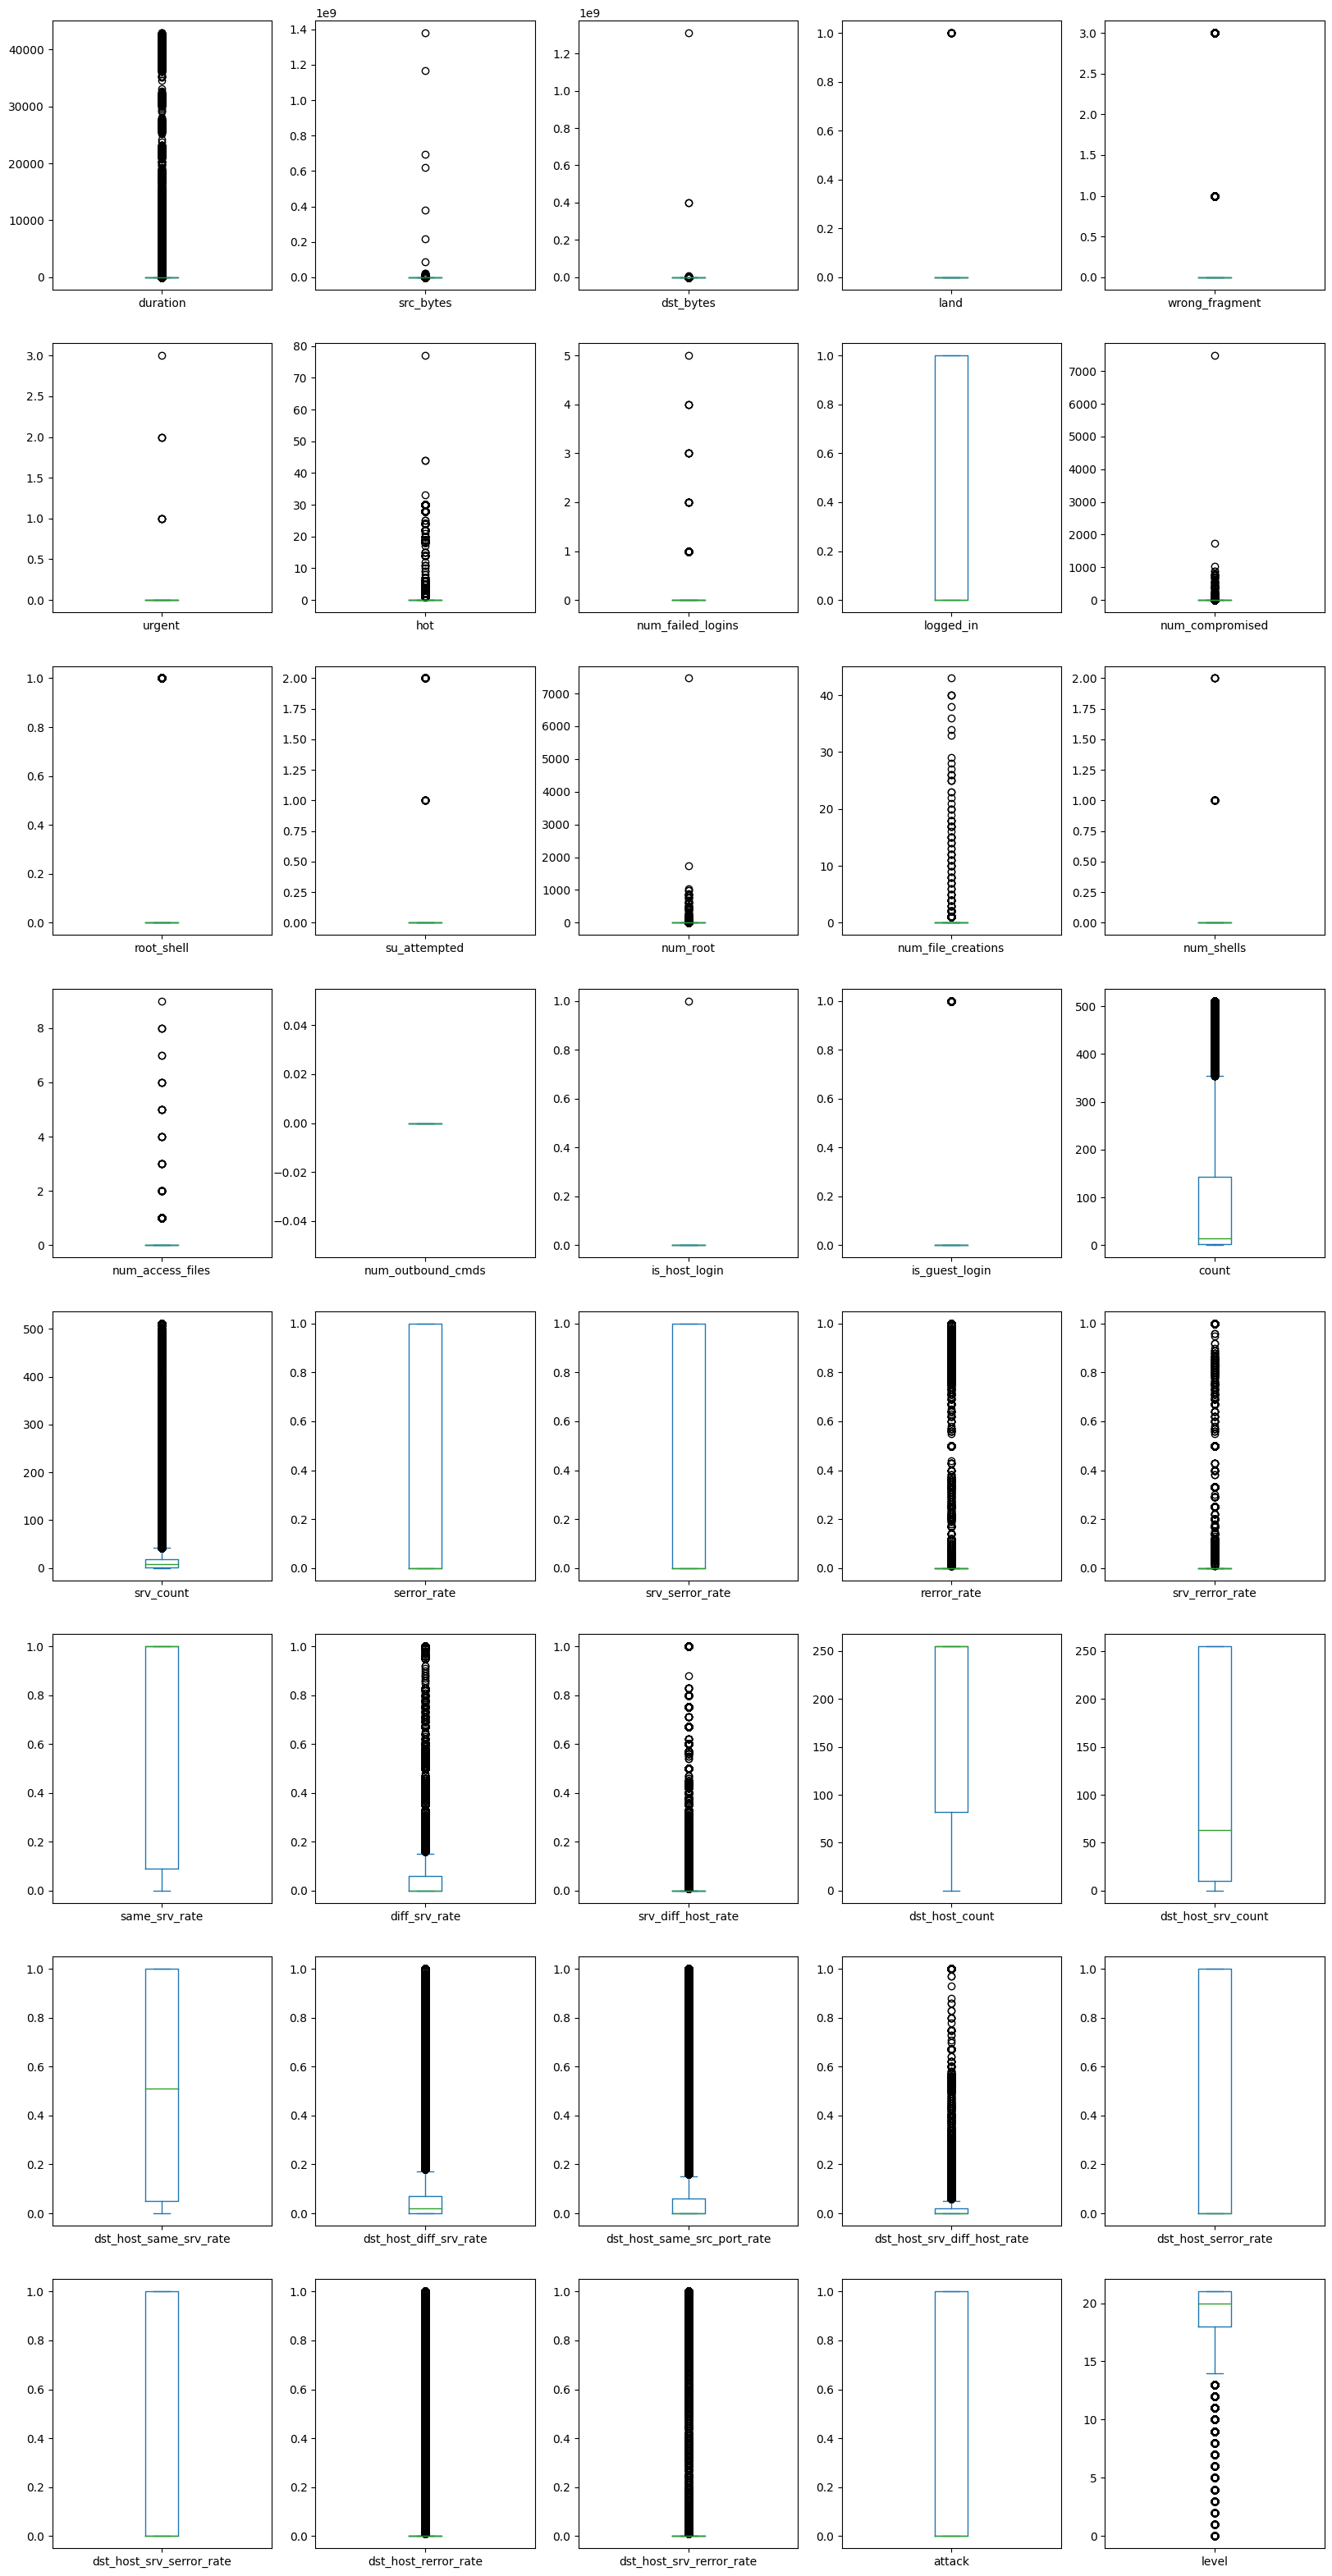

In [18]:
df_train.plot(kind='box', subplots=True, layout=(8,5), figsize=(20,40))
plt.show()


In [19]:
df_train[['protocol_type','service','flag']]

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
125968,tcp,private,S0
125969,udp,private,SF
125970,tcp,smtp,SF
125971,tcp,klogin,S0


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for item in ['protocol_type','service','flag']:
    df_train[item] = le.fit_transform(df_train[item])
    df_test[item] = le.transform(df_test[item])


In [21]:
X = df_train.drop(columns='attack')
Y = df_train['attack']
X_test = df_test.drop(columns='attack')
y_test = df_test['attack']


In [22]:
from sklearn.preprocessing import MinMaxScaler
LE = MinMaxScaler()
X = LE.fit_transform(X)
X_test = LE.transform(X_test)

In [23]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.25, random_state=22)



# Independent Component Analysis (ICA)

In [24]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=5, random_state=42)
Xtrain_ica = ica.fit_transform(Xtrain)
Xval_ica = ica.transform(Xval)
x_test_ica = ica.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(Xtrain_ica, Ytrain)

SVC(kernel='linear')

## Accuracy Evaluation

In [25]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
y_pred_train = svm_model.predict(Xtrain_ica)
y_pred_val = svm_model.predict(Xval_ica)
y_pred_test = svm_model.predict(x_test_ica)


In [26]:
pd.DataFrame({'prediction':y_pred_train, 'Actual':Ytrain},index=None).to_csv('ICA_KDD.csv')


In [27]:
df_acc1=pd.DataFrame({'prediction':y_pred_train, 'Actual':Ytrain},index=None)
df_acc2=pd.DataFrame({'prediction':y_pred_test, 'Actual':y_test},index=None)


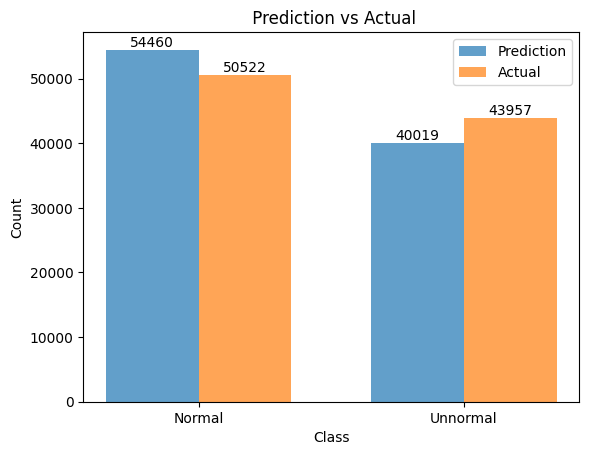

In [28]:
import matplotlib.pyplot as plt

# Assuming 'prediction' and 'Actual' are columns in your DataFrame
prediction_counts = df_acc1['prediction'].value_counts()
actual_counts = df_acc1['Actual'].value_counts()

# Bar plot
bar_width = 0.35
index = [0, 1]

fig, ax = plt.subplots()

# Plotting bars
bars1 = ax.bar(index, prediction_counts, width=bar_width, label='Prediction', alpha=0.7)
bars2 = ax.bar([i + bar_width for i in index], actual_counts, width=bar_width, label='Actual', alpha=0.7)

# Adding text labels on top of the bars
for bars, counts in zip([bars1, bars2], [prediction_counts, actual_counts]):
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title(' Prediction vs Actual')
plt.xticks([i + bar_width / 2 for i in index], ['Normal', 'Unnormal'])
plt.legend()
plt.savefig('plot_train_ICA(KDD).png')

plt.show()


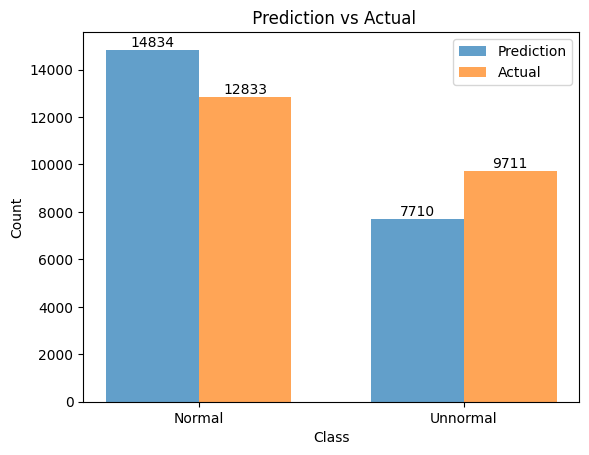

In [29]:
import matplotlib.pyplot as plt

prediction_counts = df_acc2['prediction'].value_counts()
actual_counts = df_acc2['Actual'].value_counts()

bar_width = 0.35
index = [0, 1]

fig, ax = plt.subplots()

bars1 = ax.bar(index, prediction_counts, width=bar_width, label='Prediction', alpha=0.7)
bars2 = ax.bar([i + bar_width for i in index], actual_counts, width=bar_width, label='Actual', alpha=0.7)

for bars, counts in zip([bars1, bars2], [prediction_counts, actual_counts]):
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title(' Prediction vs Actual')
plt.xticks([i + bar_width / 2 for i in index], ['Normal', 'Unnormal'])
plt.legend()
plt.savefig('plot_test_ICA(KDD).png')

plt.show()

In [30]:
print(f"Training Accuracy: {accuracy_score(Ytrain, y_pred_train):.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print(f"Validation Accuracy: {accuracy_score(Yval, y_pred_val):.2f}")


Training Accuracy: 0.89
Test Accuracy: 0.75
Validation Accuracy: 0.89


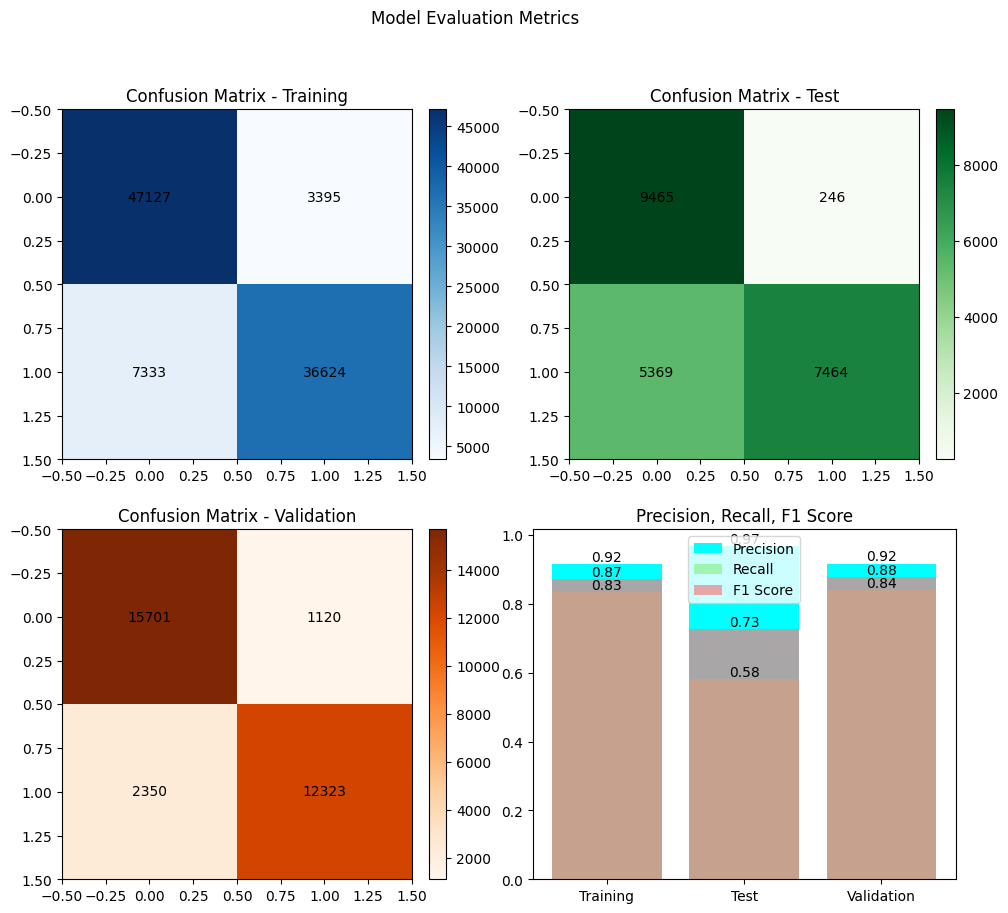

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# Assuming you have the accuracy scores stored in variables
training_accuracy = accuracy_score(Ytrain, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
validation_accuracy = accuracy_score(Yval, y_pred_val)
# Assuming you have the true labels and predicted labels
conf_matrix_train = confusion_matrix(Ytrain, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
conf_matrix_val = confusion_matrix(Yval, y_pred_val)

precision_train = precision_score(Ytrain, y_pred_train, average='binary')  # Update 'binary' based on your problem
precision_test = precision_score(y_test, y_pred_test, average='binary')  # Update 'binary' based on your problem
precision_val = precision_score(Yval, y_pred_val, average='binary')  # Update 'binary' based on your problem

recall_train = recall_score(Ytrain, y_pred_train, average='binary')  # Update 'binary' based on your problem
recall_test = recall_score(y_test, y_pred_test, average='binary')  # Update 'binary' based on your problem
recall_val = recall_score(Yval, y_pred_val, average='binary')  # Update 'binary' based on your problem

f1score_train = f1_score(Ytrain, y_pred_train, average='binary')  # Update 'binary' based on your problem
f1score_test = f1_score(y_test, y_pred_test, average='binary')  # Update 'binary' based on your problem
f1score_val = f1_score(Yval, y_pred_val, average='binary')  # Update 'binary' based on your problem

# Bar chart for accuracy
labels = ['Training', 'Test', 'Validation']
accuracies = [training_accuracy, test_accuracy, validation_accuracy]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Evaluation Metrics')

# Subplot for confusion matrix - Training
img_cm_train = axs[0, 0].imshow(conf_matrix_train, cmap='Blues', interpolation='nearest')
axs[0, 0].set_title('Confusion Matrix - Training')

# Display numerical values in confusion matrix - Training
for i in range(conf_matrix_train.shape[0]):
    for j in range(conf_matrix_train.shape[1]):
        axs[0, 0].text(j, i, str(conf_matrix_train[i, j]), ha='center', va='center', color='black')

# Subplot for confusion matrix - Test
img_cm_test = axs[0, 1].imshow(conf_matrix_test, cmap='Greens', interpolation='nearest')
axs[0, 1].set_title('Confusion Matrix - Test')

# Display numerical values in confusion matrix - Test
for i in range(conf_matrix_test.shape[0]):
    for j in range(conf_matrix_test.shape[1]):
        axs[0, 1].text(j, i, str(conf_matrix_test[i, j]), ha='center', va='center', color='black')

# Subplot for confusion matrix - Validation
img_cm_val = axs[1, 0].imshow(conf_matrix_val, cmap='Oranges', interpolation='nearest')
axs[1, 0].set_title('Confusion Matrix - Validation')

# Display numerical values in confusion matrix - Validation
for i in range(conf_matrix_val.shape[0]):
    for j in range(conf_matrix_val.shape[1]):
        axs[1, 0].text(j, i, str(conf_matrix_val[i, j]), ha='center', va='center', color='black')

# Subplots for precision, recall, and F1 score
bars_precision = axs[1, 1].bar(labels, [precision_train, precision_test, precision_val], label='Precision', color='cyan')
bars_recall = axs[1, 1].bar(labels, [recall_train, recall_test, recall_val], label='Recall', color='lightgreen', alpha=0.7)
bars_f1score = axs[1, 1].bar(labels, [f1score_train, f1score_test, f1score_val], label='F1 Score', color='lightcoral', alpha=0.7)

axs[1, 1].set_title('Precision, Recall, F1 Score')
axs[1, 1].legend()

# Adding numerical values on top of each bar
def add_values_on_top(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axs[1, 1].text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}', ha='center', va='bottom')

add_values_on_top(bars_precision, [precision_train, precision_test, precision_val])
add_values_on_top(bars_recall, [recall_train, recall_test, recall_val])
add_values_on_top(bars_f1score, [f1score_train, f1score_test, f1score_val])

# Add colorbars for confusion matrices
fig.colorbar(img_cm_train, ax=axs[0, 0], fraction=0.046, pad=0.04, orientation='vertical')
fig.colorbar(img_cm_test, ax=axs[0, 1], fraction=0.046, pad=0.04, orientation='vertical')
fig.colorbar(img_cm_val, ax=axs[1, 0], fraction=0.046, pad=0.04, orientation='vertical')

plt.savefig('evaluation_metrics_ICA(KDD).png')
plt.show()

## FFS

In [32]:
from sklearn.feature_selection import SelectFromModel


sfm = SelectFromModel(svm_model, prefit=True)
Xtrain_selected = sfm.transform(Xtrain_ica)
Xtest_selected = sfm.transform(x_test_ica)

Xval_selected = sfm.transform(Xval_ica)

svm_model_selected = SVC(kernel='linear')
svm_model_selected.fit(Xtrain_selected, Ytrain)

SVC(kernel='linear')

In [33]:
from sklearn.metrics import accuracy_score
y_pred_train_ffs = svm_model_selected.predict(Xtrain_selected)
y_pred_val_ffs = svm_model_selected.predict(Xval_selected)
y_pred_test_ffs = svm_model_selected.predict(Xtest_selected)

df_acc_fss1=pd.DataFrame({'prediction':y_pred_train_ffs, 'Actual':Ytrain},index=None)
df_acc_fss2=pd.DataFrame({'prediction':y_pred_test_ffs, 'Actual':y_test},index=None)


In [34]:
pd.DataFrame({'prediction':y_pred_train_ffs, 'Actual':Ytrain},index=None).to_csv('FFS_KDD.csv')


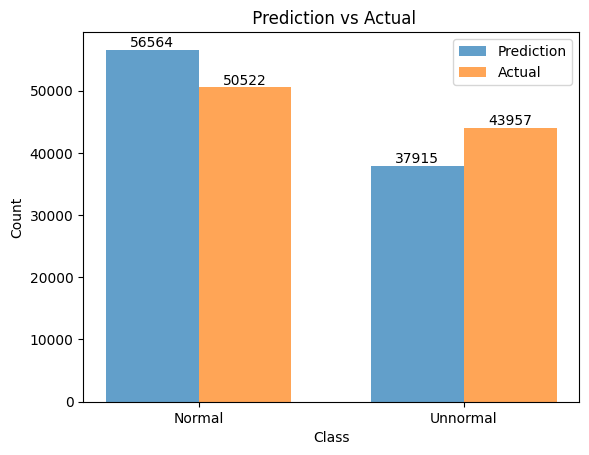

In [35]:
import matplotlib.pyplot as plt

# Assuming 'prediction' and 'Actual' are columns in your DataFrame
prediction_counts = df_acc_fss1['prediction'].value_counts()
actual_counts = df_acc_fss1['Actual'].value_counts()

# Bar plot
bar_width = 0.35
index = [0, 1]

fig, ax = plt.subplots()

# Plotting bars
bars1 = ax.bar(index, prediction_counts, width=bar_width, label='Prediction', alpha=0.7)
bars2 = ax.bar([i + bar_width for i in index], actual_counts, width=bar_width, label='Actual', alpha=0.7)

# Adding text labels on top of the bars
for bars, counts in zip([bars1, bars2], [prediction_counts, actual_counts]):
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title(' Prediction vs Actual')
plt.xticks([i + bar_width / 2 for i in index], ['Normal', 'Unnormal'])
plt.legend()
plt.savefig('plot_train_FFS(KDD).png')

plt.show()


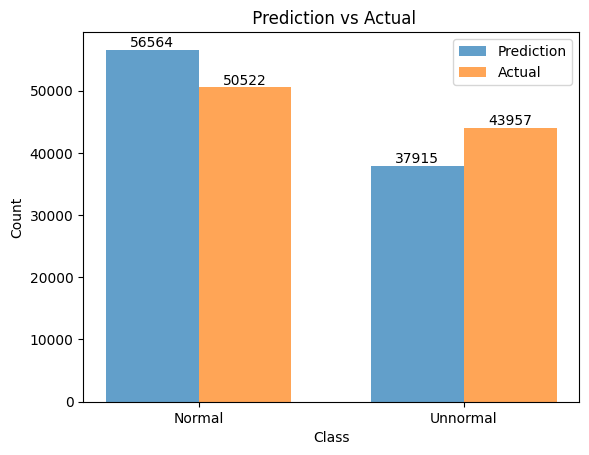

In [36]:
import matplotlib.pyplot as plt

# Assuming 'prediction' and 'Actual' are columns in your DataFrame
prediction_counts = df_acc_fss1['prediction'].value_counts()
actual_counts = df_acc_fss1['Actual'].value_counts()

# Bar plot
bar_width = 0.35
index = [0, 1]

fig, ax = plt.subplots()

# Plotting bars
bars1 = ax.bar(index, prediction_counts, width=bar_width, label='Prediction', alpha=0.7)
bars2 = ax.bar([i + bar_width for i in index], actual_counts, width=bar_width, label='Actual', alpha=0.7)

# Adding text labels on top of the bars
for bars, counts in zip([bars1, bars2], [prediction_counts, actual_counts]):
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title(' Prediction vs Actual')
plt.xticks([i + bar_width / 2 for i in index], ['Normal', 'Unnormal'])
plt.legend()
plt.savefig('plot_test_FFS(KDD).png')

plt.show()


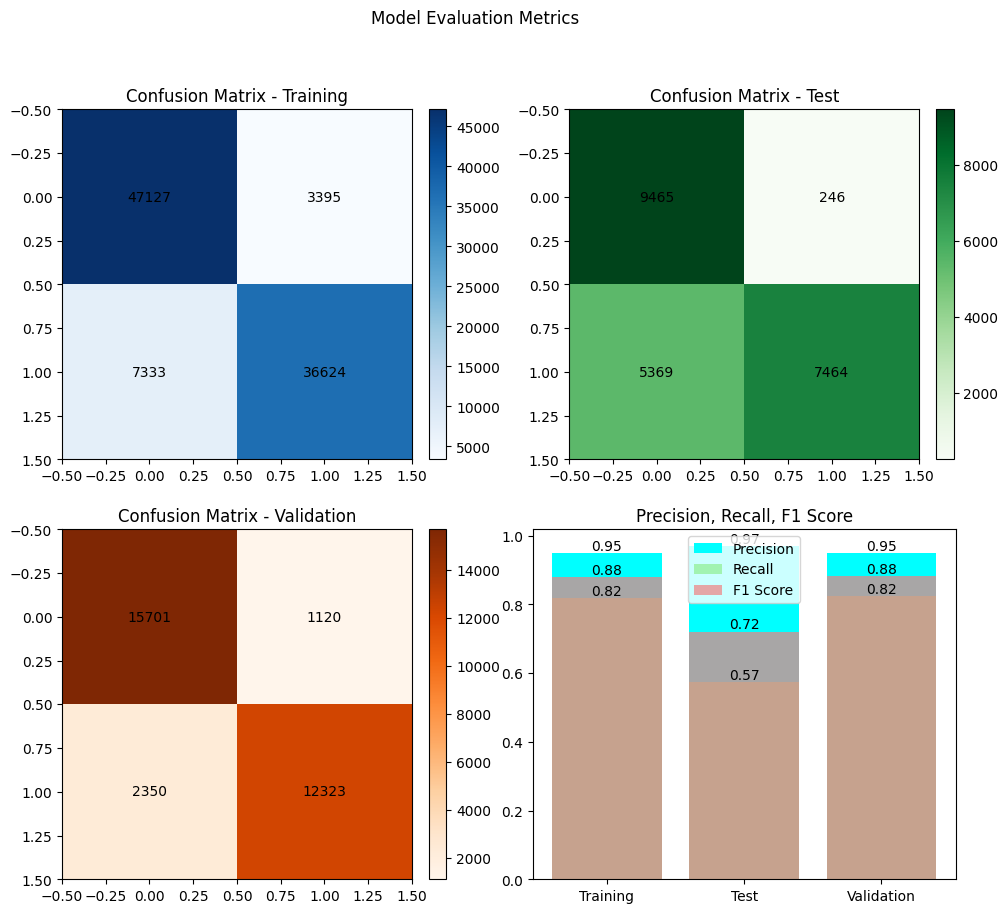

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the accuracy scores stored in variables
training_accuracy = accuracy_score(Ytrain, y_pred_train_ffs)
test_accuracy = accuracy_score(y_test, y_pred_test_ffs)
validation_accuracy = accuracy_score(Yval, y_pred_val_ffs)

precision_train = precision_score(Ytrain, y_pred_train_ffs, average='binary')  # Update 'binary' based on your problem
precision_test = precision_score(y_test, y_pred_test_ffs, average='binary')  # Update 'binary' based on your problem
precision_val = precision_score(Yval, y_pred_val_ffs, average='binary')  # Update 'binary' based on your problem

recall_train = recall_score(Ytrain, y_pred_train_ffs, average='binary')  # Update 'binary' based on your problem
recall_test = recall_score(y_test, y_pred_test_ffs, average='binary')  # Update 'binary' based on your problem
recall_val = recall_score(Yval, y_pred_val_ffs, average='binary')  # Update 'binary' based on your problem

f1score_train = f1_score(Ytrain, y_pred_train_ffs, average='binary')  # Update 'binary' based on your problem
f1score_test = f1_score(y_test, y_pred_test_ffs, average='binary')  # Update 'binary' based on your problem
f1score_val = f1_score(Yval, y_pred_val_ffs, average='binary')  # Update 'binary' based on your problem
# Bar chart for accuracy

labels = ['Training', 'Test', 'Validation']
accuracies = [training_accuracy, test_accuracy, validation_accuracy]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Evaluation Metrics')

# Subplot for confusion matrix - Training
img_cm_train = axs[0, 0].imshow(conf_matrix_train, cmap='Blues', interpolation='nearest')
axs[0, 0].set_title('Confusion Matrix - Training')

# Display numerical values in confusion matrix - Training
for i in range(conf_matrix_train.shape[0]):
    for j in range(conf_matrix_train.shape[1]):
        axs[0, 0].text(j, i, str(conf_matrix_train[i, j]), ha='center', va='center', color='black')

# Subplot for confusion matrix - Test
img_cm_test = axs[0, 1].imshow(conf_matrix_test, cmap='Greens', interpolation='nearest')
axs[0, 1].set_title('Confusion Matrix - Test')

# Display numerical values in confusion matrix - Test
for i in range(conf_matrix_test.shape[0]):
    for j in range(conf_matrix_test.shape[1]):
        axs[0, 1].text(j, i, str(conf_matrix_test[i, j]), ha='center', va='center', color='black')

# Subplot for confusion matrix - Validation
img_cm_val = axs[1, 0].imshow(conf_matrix_val, cmap='Oranges', interpolation='nearest')
axs[1, 0].set_title('Confusion Matrix - Validation')

# Display numerical values in confusion matrix - Validation
for i in range(conf_matrix_val.shape[0]):
    for j in range(conf_matrix_val.shape[1]):
        axs[1, 0].text(j, i, str(conf_matrix_val[i, j]), ha='center', va='center', color='black')

# Subplots for precision, recall, and F1 score
bars_precision = axs[1, 1].bar(labels, [precision_train, precision_test, precision_val], label='Precision', color='cyan')
bars_recall = axs[1, 1].bar(labels, [recall_train, recall_test, recall_val], label='Recall', color='lightgreen', alpha=0.7)
bars_f1score = axs[1, 1].bar(labels, [f1score_train, f1score_test, f1score_val], label='F1 Score', color='lightcoral', alpha=0.7)

axs[1, 1].set_title('Precision, Recall, F1 Score')
axs[1, 1].legend()

# Adding numerical values on top of each bar
def add_values_on_top(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axs[1, 1].text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}', ha='center', va='bottom')

add_values_on_top(bars_precision, [precision_train, precision_test, precision_val])
add_values_on_top(bars_recall, [recall_train, recall_test, recall_val])
add_values_on_top(bars_f1score, [f1score_train, f1score_test, f1score_val])

# Add colorbars for confusion matrices
fig.colorbar(img_cm_train, ax=axs[0, 0], fraction=0.046, pad=0.04, orientation='vertical')
fig.colorbar(img_cm_test, ax=axs[0, 1], fraction=0.046, pad=0.04, orientation='vertical')
fig.colorbar(img_cm_val, ax=axs[1, 0], fraction=0.046, pad=0.04, orientation='vertical')

plt.savefig('evaluation_metrics_FFS(KDD).png')
plt.show()

# UNSW DATASET

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [39]:
df_train2 = pd.read_parquet('/content/UNSW_NB15_training-set.parquet')
df_test2 = pd.read_parquet('/content/UNSW_NB15_testing-set.parquet')


In [40]:
df_train2.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.09375,180363632.0,...,0,0,1,1,0,0,0,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00000,881000000.0,...,0,0,1,1,0,0,0,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00000,854400000.0,...,0,0,1,1,0,0,0,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.65625,600000000.0,...,0,0,2,1,0,0,0,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00000,850400000.0,...,0,0,2,1,0,0,0,0,Normal,0


In [41]:
df_train2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   dur                82332 non-null  float32 
 1   proto              82332 non-null  category
 2   service            82332 non-null  category
 3   state              82332 non-null  category
 4   spkts              82332 non-null  int16   
 5   dpkts              82332 non-null  int16   
 6   sbytes             82332 non-null  int32   
 7   dbytes             82332 non-null  int32   
 8   rate               82332 non-null  float32 
 9   sload              82332 non-null  float32 
 10  dload              82332 non-null  float32 
 11  sloss              82332 non-null  int16   
 12  dloss              82332 non-null  int16   
 13  sinpkt             82332 non-null  float32 
 14  dinpkt             82332 non-null  float32 
 15  sjit               82332 non-null  float32 
 16  djit

In [42]:
df_test2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                175341 non-null  float32 
 1   proto              175341 non-null  category
 2   service            175341 non-null  category
 3   state              175341 non-null  category
 4   spkts              175341 non-null  int16   
 5   dpkts              175341 non-null  int16   
 6   sbytes             175341 non-null  int32   
 7   dbytes             175341 non-null  int32   
 8   rate               175341 non-null  float32 
 9   sload              175341 non-null  float32 
 10  dload              175341 non-null  float32 
 11  sloss              175341 non-null  int16   
 12  dloss              175341 non-null  int16   
 13  sinpkt             175341 non-null  float32 
 14  dinpkt             175341 non-null  float32 
 15  sjit               175341 non-null

In [43]:
df_train2.drop(columns=['attack_cat','service'],inplace=True)
df_test2.drop(columns=['attack_cat','service'],inplace=True)

In [44]:
df_test2.isnull().sum()

dur                  0
proto                0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
label                0
dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
categorical_columns = ['proto','state']
for column in categorical_columns:

    train_encoded = encoder.fit_transform(df_train2[[column]])

    test_encoded = encoder.transform(df_test2[[column]])

    train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out([column]))
    test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out([column]))

    df_train2 = pd.concat([df_train2, train_encoded_df], axis=1)
    df_test2 = pd.concat([df_test2, test_encoded_df], axis=1)

    df_train2.drop(column, axis=1, inplace=True)
    df_test2.drop(column, axis=1, inplace=True)


In [46]:
X = df_train2.drop(columns='label')
Y = df_train2['label']
X_test = df_test2.drop(columns='label')
y_test = df_test2['label']

In [47]:
from sklearn.preprocessing import MinMaxScaler
LE = MinMaxScaler()
X = LE.fit_transform(X)
X_test = LE.transform(X_test)

In [48]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.3, random_state=22)

# Independent Component Analysis (ICA)

In [49]:
from sklearn.decomposition import FastICA
from sklearn.svm import SVC

ica = FastICA(n_components=5, random_state=42)
Xtrain_ica = ica.fit_transform(Xtrain)
Xval_ica = ica.transform(Xval)
x_test_ica = ica.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(Xtrain_ica, Ytrain)

SVC(kernel='linear')

In [50]:
from sklearn.metrics import accuracy_score
y_pred_train = svm_model.predict(Xtrain_ica)
y_pred_val = svm_model.predict(Xval_ica)
y_pred_test = svm_model.predict(x_test_ica)

In [51]:
pd.DataFrame({'prediction':y_pred_train, 'Actual':Ytrain},index=None).to_csv('ICA_UNSW.csv')


In [52]:
df_acc1=pd.DataFrame({'prediction':y_pred_train, 'Actual':Ytrain},index=None)
df_acc2=pd.DataFrame({'prediction':y_pred_test, 'Actual':y_test},index=None)


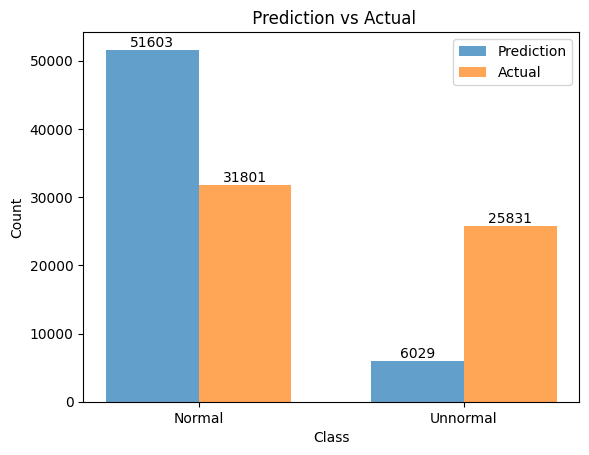

In [53]:
import matplotlib.pyplot as plt

# Assuming 'prediction' and 'Actual' are columns in your DataFrame
prediction_counts = df_acc1['prediction'].value_counts()
actual_counts = df_acc1['Actual'].value_counts()

# Bar plot
bar_width = 0.35
index = [0, 1]

fig, ax = plt.subplots()

# Plotting bars
bars1 = ax.bar(index, prediction_counts, width=bar_width, label='Prediction', alpha=0.7)
bars2 = ax.bar([i + bar_width for i in index], actual_counts, width=bar_width, label='Actual', alpha=0.7)

# Adding text labels on top of the bars
for bars, counts in zip([bars1, bars2], [prediction_counts, actual_counts]):
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title(' Prediction vs Actual')
plt.xticks([i + bar_width / 2 for i in index], ['Normal', 'Unnormal'])
plt.legend()
plt.savefig('plot_train_ICA(UNSW).png')

plt.show()


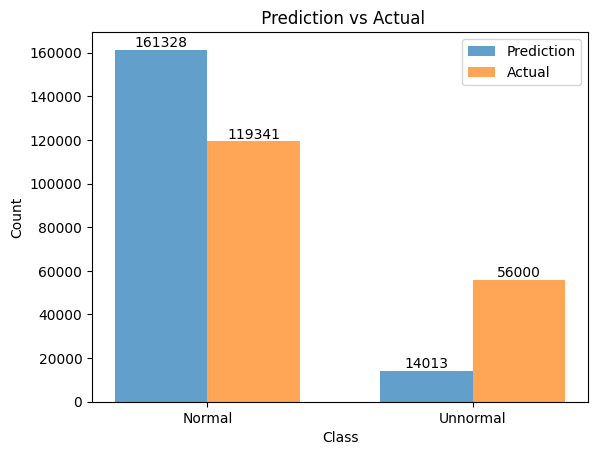

In [54]:
import matplotlib.pyplot as plt

# Assuming 'prediction' and 'Actual' are columns in your DataFrame
prediction_counts = df_acc2['prediction'].value_counts()
actual_counts = df_acc2['Actual'].value_counts()

# Bar plot
bar_width = 0.35
index = [0, 1]

fig, ax = plt.subplots()

# Plotting bars
bars1 = ax.bar(index, prediction_counts, width=bar_width, label='Prediction', alpha=0.7)
bars2 = ax.bar([i + bar_width for i in index], actual_counts, width=bar_width, label='Actual', alpha=0.7)

# Adding text labels on top of the bars
for bars, counts in zip([bars1, bars2], [prediction_counts, actual_counts]):
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title(' Prediction vs Actual')
plt.xticks([i + bar_width / 2 for i in index], ['Normal', 'Unnormal'])
plt.legend()
plt.savefig('plot_test_ICA(UNSW).png')

plt.show()


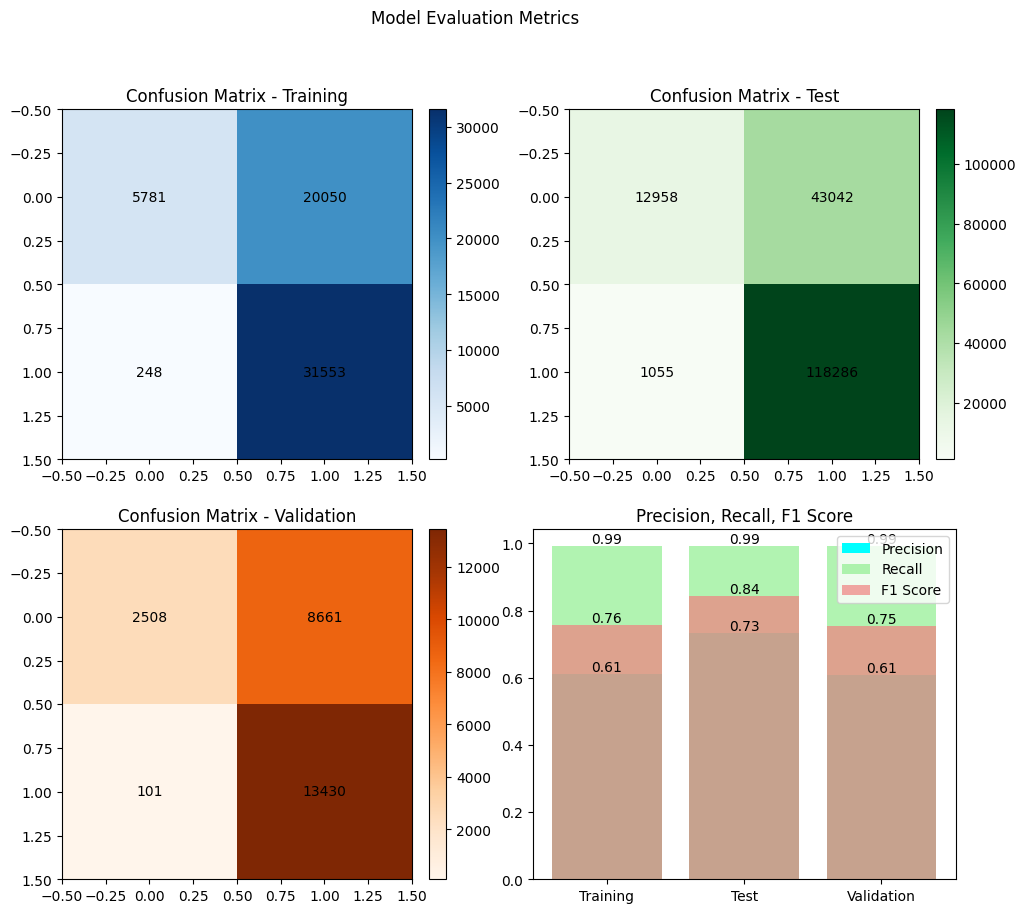

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# Assuming you have the accuracy scores stored in variables
training_accuracy = accuracy_score(Ytrain, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
validation_accuracy = accuracy_score(Yval, y_pred_val)
# Assuming you have the true labels and predicted labels
conf_matrix_train = confusion_matrix(Ytrain, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
conf_matrix_val = confusion_matrix(Yval, y_pred_val)

precision_train = precision_score(Ytrain, y_pred_train, average='binary')  # Update 'binary' based on your problem
precision_test = precision_score(y_test, y_pred_test, average='binary')  # Update 'binary' based on your problem
precision_val = precision_score(Yval, y_pred_val, average='binary')  # Update 'binary' based on your problem

recall_train = recall_score(Ytrain, y_pred_train, average='binary')  # Update 'binary' based on your problem
recall_test = recall_score(y_test, y_pred_test, average='binary')  # Update 'binary' based on your problem
recall_val = recall_score(Yval, y_pred_val, average='binary')  # Update 'binary' based on your problem

f1score_train = f1_score(Ytrain, y_pred_train, average='binary')  # Update 'binary' based on your problem
f1score_test = f1_score(y_test, y_pred_test, average='binary')  # Update 'binary' based on your problem
f1score_val = f1_score(Yval, y_pred_val, average='binary')  # Update 'binary' based on your problem

# Bar chart for accuracy
labels = ['Training', 'Test', 'Validation']
accuracies = [training_accuracy, test_accuracy, validation_accuracy]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Evaluation Metrics')

# Subplot for confusion matrix - Training
img_cm_train = axs[0, 0].imshow(conf_matrix_train, cmap='Blues', interpolation='nearest')
axs[0, 0].set_title('Confusion Matrix - Training')

# Display numerical values in confusion matrix - Training
for i in range(conf_matrix_train.shape[0]):
    for j in range(conf_matrix_train.shape[1]):
        axs[0, 0].text(j, i, str(conf_matrix_train[i, j]), ha='center', va='center', color='black')

# Subplot for confusion matrix - Test
img_cm_test = axs[0, 1].imshow(conf_matrix_test, cmap='Greens', interpolation='nearest')
axs[0, 1].set_title('Confusion Matrix - Test')

# Display numerical values in confusion matrix - Test
for i in range(conf_matrix_test.shape[0]):
    for j in range(conf_matrix_test.shape[1]):
        axs[0, 1].text(j, i, str(conf_matrix_test[i, j]), ha='center', va='center', color='black')

# Subplot for confusion matrix - Validation
img_cm_val = axs[1, 0].imshow(conf_matrix_val, cmap='Oranges', interpolation='nearest')
axs[1, 0].set_title('Confusion Matrix - Validation')

# Display numerical values in confusion matrix - Validation
for i in range(conf_matrix_val.shape[0]):
    for j in range(conf_matrix_val.shape[1]):
        axs[1, 0].text(j, i, str(conf_matrix_val[i, j]), ha='center', va='center', color='black')

# Subplots for precision, recall, and F1 score
bars_precision = axs[1, 1].bar(labels, [precision_train, precision_test, precision_val], label='Precision', color='cyan')
bars_recall = axs[1, 1].bar(labels, [recall_train, recall_test, recall_val], label='Recall', color='lightgreen', alpha=0.7)
bars_f1score = axs[1, 1].bar(labels, [f1score_train, f1score_test, f1score_val], label='F1 Score', color='lightcoral', alpha=0.7)

axs[1, 1].set_title('Precision, Recall, F1 Score')
axs[1, 1].legend()

# Adding numerical values on top of each bar
def add_values_on_top(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axs[1, 1].text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}', ha='center', va='bottom')

add_values_on_top(bars_precision, [precision_train, precision_test, precision_val])
add_values_on_top(bars_recall, [recall_train, recall_test, recall_val])
add_values_on_top(bars_f1score, [f1score_train, f1score_test, f1score_val])

# Add colorbars for confusion matrices
fig.colorbar(img_cm_train, ax=axs[0, 0], fraction=0.046, pad=0.04, orientation='vertical')
fig.colorbar(img_cm_test, ax=axs[0, 1], fraction=0.046, pad=0.04, orientation='vertical')
fig.colorbar(img_cm_val, ax=axs[1, 0], fraction=0.046, pad=0.04, orientation='vertical')

plt.savefig('evaluation_metrics_ICA(UNSW).png')
plt.show()

## FFS

In [56]:
from sklearn.feature_selection import SelectFromModel


sfm = SelectFromModel(svm_model, prefit=True)
Xtrain_selected = sfm.fit_transform(Xtrain_ica)
Xval_selected = sfm.transform(Xval_ica)
x_test_selected = sfm.transform(x_test_ica)
svm_model_selected = SVC(kernel='linear')
svm_model_selected.fit(Xtrain_selected, Ytrain)

SVC(kernel='linear')

In [57]:
y_pred_train_ffs = svm_model_selected.predict(Xtrain_selected)
y_pred_val_ffs = svm_model_selected.predict(Xval_selected)
y_pred_test_fss = svm_model_selected.predict(x_test_selected)


In [58]:
df_acc_fss1=pd.DataFrame({'prediction':y_pred_train_ffs, 'Actual':Ytrain},index=None)


In [59]:
df_acc_fss2=pd.DataFrame({'prediction':y_pred_test_fss, 'Actual':y_test},index=None)


In [60]:
pd.DataFrame({'prediction':y_pred_train, 'Actual':Ytrain},index=None).to_csv('FFS_UNSW.csv')


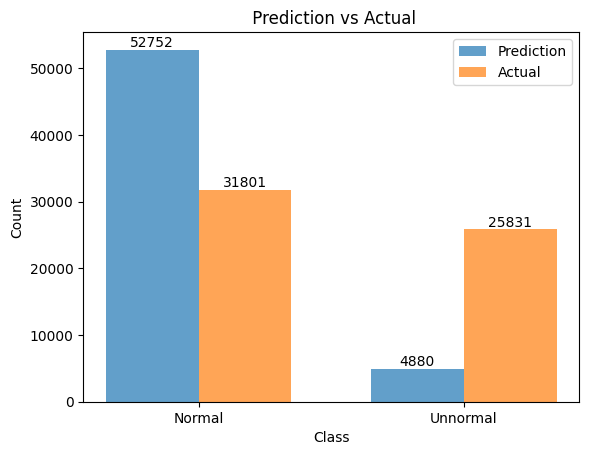

In [61]:
import matplotlib.pyplot as plt

# Assuming 'prediction' and 'Actual' are columns in your DataFrame
prediction_counts = df_acc_fss1['prediction'].value_counts()
actual_counts = df_acc_fss1['Actual'].value_counts()

# Bar plot
bar_width = 0.35
index = [0, 1]

fig, ax = plt.subplots()

# Plotting bars
bars1 = ax.bar(index, prediction_counts, width=bar_width, label='Prediction', alpha=0.7)
bars2 = ax.bar([i + bar_width for i in index], actual_counts, width=bar_width, label='Actual', alpha=0.7)

# Adding text labels on top of the bars
for bars, counts in zip([bars1, bars2], [prediction_counts, actual_counts]):
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title(' Prediction vs Actual')
plt.xticks([i + bar_width / 2 for i in index], ['Normal', 'Unnormal'])
plt.legend()
plt.savefig('plot_train_FFS(UNSW).png')

plt.show()


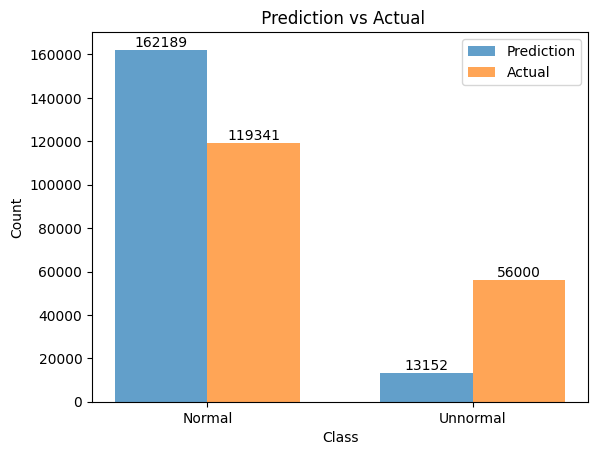

In [62]:
import matplotlib.pyplot as plt

# Assuming 'prediction' and 'Actual' are columns in your DataFrame
prediction_counts = df_acc_fss2['prediction'].value_counts()
actual_counts = df_acc_fss2['Actual'].value_counts()

# Bar plot
bar_width = 0.35
index = [0, 1]

fig, ax = plt.subplots()

# Plotting bars
bars1 = ax.bar(index, prediction_counts, width=bar_width, label='Prediction', alpha=0.7)
bars2 = ax.bar([i + bar_width for i in index], actual_counts, width=bar_width, label='Actual', alpha=0.7)

# Adding text labels on top of the bars
for bars, counts in zip([bars1, bars2], [prediction_counts, actual_counts]):
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title(' Prediction vs Actual')
plt.xticks([i + bar_width / 2 for i in index], ['Normal', 'Unnormal'])
plt.legend()
plt.savefig('plot_test_FFS(UNSW).png')

plt.show()

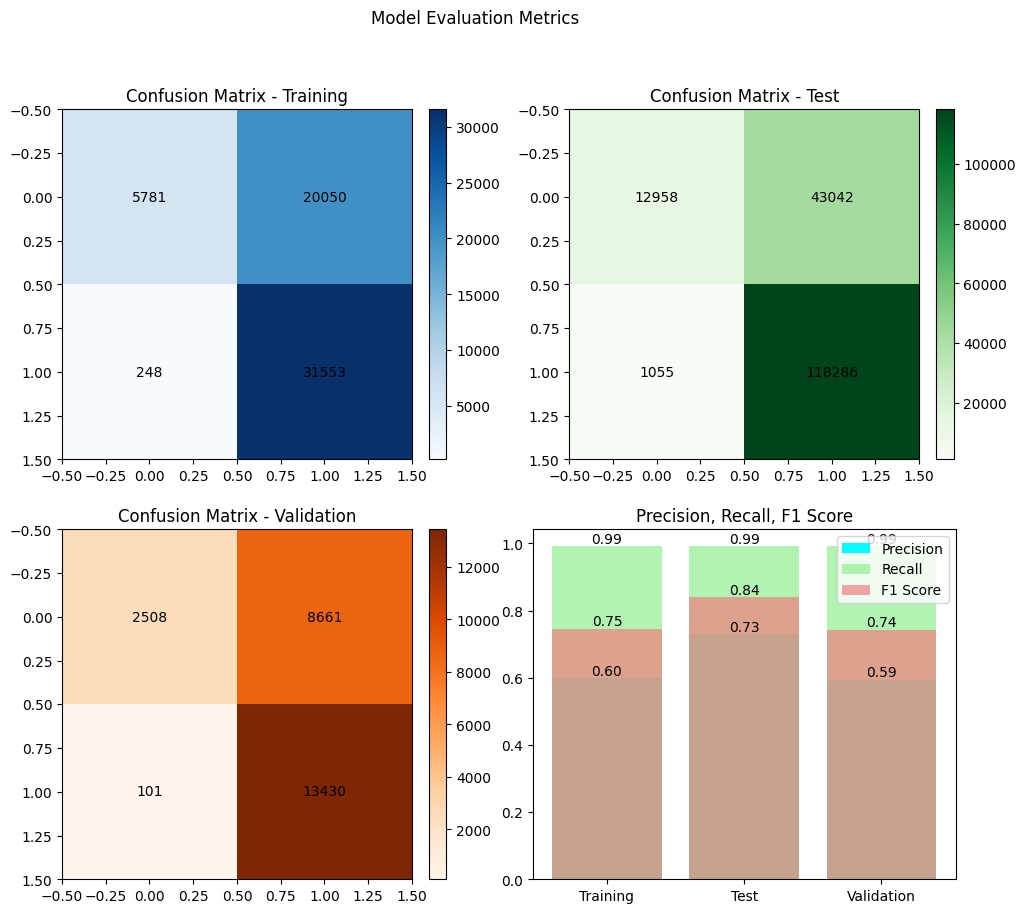

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the accuracy scores stored in variables
training_accuracy = accuracy_score(Ytrain, y_pred_train_ffs)
test_accuracy = accuracy_score(y_test, y_pred_test_fss)
validation_accuracy = accuracy_score(Yval, y_pred_val_ffs)

precision_train = precision_score(Ytrain, y_pred_train_ffs, average='binary')  # Update 'binary' based on your problem
precision_test = precision_score(y_test, y_pred_test_fss, average='binary')  # Update 'binary' based on your problem
precision_val = precision_score(Yval, y_pred_val_ffs, average='binary')  # Update 'binary' based on your problem

recall_train = recall_score(Ytrain, y_pred_train_ffs, average='binary')  # Update 'binary' based on your problem
recall_test = recall_score(y_test, y_pred_test_fss, average='binary')  # Update 'binary' based on your problem
recall_val = recall_score(Yval, y_pred_val_ffs, average='binary')  # Update 'binary' based on your problem

f1score_train = f1_score(Ytrain, y_pred_train_ffs, average='binary')  # Update 'binary' based on your problem
f1score_test = f1_score(y_test, y_pred_test_fss, average='binary')  # Update 'binary' based on your problem
f1score_val = f1_score(Yval, y_pred_val_ffs, average='binary')  # Update 'binary' based on your problem
# Bar chart for accuracy

labels = ['Training', 'Test', 'Validation']
accuracies = [training_accuracy, test_accuracy, validation_accuracy]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Evaluation Metrics')

# Subplot for confusion matrix - Training
img_cm_train = axs[0, 0].imshow(conf_matrix_train, cmap='Blues', interpolation='nearest')
axs[0, 0].set_title('Confusion Matrix - Training')

# Display numerical values in confusion matrix - Training
for i in range(conf_matrix_train.shape[0]):
    for j in range(conf_matrix_train.shape[1]):
        axs[0, 0].text(j, i, str(conf_matrix_train[i, j]), ha='center', va='center', color='black')

# Subplot for confusion matrix - Test
img_cm_test = axs[0, 1].imshow(conf_matrix_test, cmap='Greens', interpolation='nearest')
axs[0, 1].set_title('Confusion Matrix - Test')

# Display numerical values in confusion matrix - Test
for i in range(conf_matrix_test.shape[0]):
    for j in range(conf_matrix_test.shape[1]):
        axs[0, 1].text(j, i, str(conf_matrix_test[i, j]), ha='center', va='center', color='black')

# Subplot for confusion matrix - Validation
img_cm_val = axs[1, 0].imshow(conf_matrix_val, cmap='Oranges', interpolation='nearest')
axs[1, 0].set_title('Confusion Matrix - Validation')

# Display numerical values in confusion matrix - Validation
for i in range(conf_matrix_val.shape[0]):
    for j in range(conf_matrix_val.shape[1]):
        axs[1, 0].text(j, i, str(conf_matrix_val[i, j]), ha='center', va='center', color='black')

# Subplots for precision, recall, and F1 score
bars_precision = axs[1, 1].bar(labels, [precision_train, precision_test, precision_val], label='Precision', color='cyan')
bars_recall = axs[1, 1].bar(labels, [recall_train, recall_test, recall_val], label='Recall', color='lightgreen', alpha=0.7)
bars_f1score = axs[1, 1].bar(labels, [f1score_train, f1score_test, f1score_val], label='F1 Score', color='lightcoral', alpha=0.7)

axs[1, 1].set_title('Precision, Recall, F1 Score')
axs[1, 1].legend()

# Adding numerical values on top of each bar
def add_values_on_top(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axs[1, 1].text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}', ha='center', va='bottom')

add_values_on_top(bars_precision, [precision_train, precision_test, precision_val])
add_values_on_top(bars_recall, [recall_train, recall_test, recall_val])
add_values_on_top(bars_f1score, [f1score_train, f1score_test, f1score_val])

# Add colorbars for confusion matrices
fig.colorbar(img_cm_train, ax=axs[0, 0], fraction=0.046, pad=0.04, orientation='vertical')
fig.colorbar(img_cm_test, ax=axs[0, 1], fraction=0.046, pad=0.04, orientation='vertical')
fig.colorbar(img_cm_val, ax=axs[1, 0], fraction=0.046, pad=0.04, orientation='vertical')

plt.savefig('evaluation_metrics_FFS(UNSW).png')
plt.show()